# 图象处理相关函数使用示例 

一切的编程都要先确保编程环境的正确配置。先运行下方代码块检查一下你是否已经安装了接下来所需要的所有依赖库。

In [1]:
import cv2 #计算机视觉库,常用，你一定需要它。如果报错是没有这个库，请在Powershell界面使用“pip install opencv-python”命令安装
from PIL import Image #图象处理库，你大概率需要它，如果报错是没有这个库，请在Powershell界面使用“pip install pillow”命令安装 
import os #用于和操作系统交互的内置库，你需要操作文件，所以你很有可能需要用到它
import numpy as np #用于矩阵运算的库，如果你也是使用Anaconda作为编程环境，同样应该随Python一同安装在你的环境中
import matplotlib.pyplot as plt #用于画图的库，在Anaconda环境中同样应该是已安装的

如果上面的库全部安装正确没有报错，就可以继续进行了。

## 理论知识

我担心你学习的路上走弯路，所以想稍微提一点理论知识：我想你可能比我清楚，对于计算机而言，图象就是矩阵。你可以想象：灰度图（8位图象）就是一个元素范围在0-255的矩阵，彩色图（RGB）就是三个元素范围在0-255的矩阵。所以一切图象问题实际上都是矩阵问题，所以如果编程遇到问题，线代的知识很可能很有用。

## 示例1：图象求分辨率、图象切割、图象旋转

就像我上面所说，图象的本质是矩阵，所以接下来的操作本质都是矩阵变换。运行前请确保示例图片与本教程处于同一文件夹内（注：其实修改下面代码块中的地址至文件所在的正确位置同样可以得到正确的结果，但别忘了，Python中文件地址的分隔符（/）和Window相反，所以记得修改）

In [2]:
#此代码块使用的都是OpenCV（cv2）模块的函数，要用Python进行图象处理就一定会使用这些函数，这里的函数有获取图象长宽、获取图象的一部分以及旋转图象
#我曾经用过的差不多都在这里了，要是有什么没涉及到的随时来问我吧（笑）

# 读取图像  
image = cv2.imread('Image 7.tif')  
  
# 获取图像的分辨率（这个函数返回图象的高度，宽度和通道）  
height, width = image.shape[:2]  
print(f"分辨率: {width}x{height}")  
  
# 切割图像（截出了一个100*100的方块，注意Python和人不同，数数从0开始数）
x, y, w, h = 100, 100, 200, 200  
roi = image[y:y+h, x:x+w]  
  
# 旋转切割后的图像  
(h_roi, w_roi) = roi.shape[:2]  
center_roi = (w_roi // 2, h_roi // 2)  
M = cv2.getRotationMatrix2D(center_roi, 45, 1.0)  
rotated_roi = cv2.warpAffine(roi, M, (w_roi, h_roi))  
  
# 保存并显示旋转后的切割图像（我实际并不推荐显示图片，因为这会弹出一个窗口，阻止代码块完整运行，我建议保存文件即可） 
cv2.imwrite('Rotated_ROI.jpg', rotated_roi)
#如果想要查看图片请删去下方两个井号
#cv2.imshow('Rotated ROI', rotated_roi)  
#cv2.waitKey(0)  
cv2.destroyAllWindows()

分辨率: 2048x2048


## 示例2：打开彩色图片并将其转化为灰度图

这是我曾经项目里需要做的其中一步操作，这里用了三种方法来解决这个问题，前两种使用库（cv2，PIL）的内置函数，后一种使用numpy进行手动矩阵操作，用于进行对比，给你一些参考。

In [3]:
#使用cv2库内转换函数的操作方法，如果你成功运行了上面的代码块，此代码块应该能获得一个名为“gray_image_cv2.jpg”的文件
original_image = cv2.imread('Image 7.tif') # ‘cv2.imread（）’为cv2库读取图片的函数，必需参数为图象的正确地址
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) # ‘cv2.cvtColor（）’为该库转换颜色空间的函数，必需参数为图象和转换方法
cv2.imwrite('gray_image_cv2.jpg', gray_image)  # 'cv2.imwrite()'函数为cv2存储图片的函数，必需参数为图象储存地址和图象本身
cv2.destroyAllWindows() #关闭窗口以释放内存。cv2库如果你不进行这一步可能导致内存持续被占用，容易造成内存溢出，所以应用完cv2后记得运行该函数

#cv2库最值得注意的一点是该库的默认颜色显示通道顺序为BGR，而非常见的RGB，如果你需要处理彩色图片那记住这一点很重要。
#其他方法和该方法拥有类似的步骤，都是‘打开文件→修改文件→保存文件’这一流程，故接下来数个方法将减少注释。

In [4]:
#使用Pillow库内转换函数的操作方法，如果你的环境没有问题，此代码块应该能获得一个名为“gray_image_PIL.jpg”的文件
original_image = Image.open('Image 7.tif')  #打开原图片 
gray_image = original_image.convert('L') # 将原图片转换为灰度图 
gray_image.save('gray_image_PIL.jpg')  #保存灰度图  

In [5]:
#使用numpy和灰度转化公式手动生成灰度图的操作方法，如果你的环境没有问题，此代码块应该能获得一个名为“gray_image_manual.jpg”的文件
original_image = Image.open('Image 7.tif')  #打开原图片
original_array = np.array(original_image)  

gray_array = 0.2126 * original_array[:,:,0] + 0.7152 * original_array[:,:,1] + 0.0722 * original_array[:,:,2]  #使用公式将原图转换为灰度图
gray_image = Image.fromarray(gray_array.astype('uint8')) 

gray_image.save('gray_image_manual.jpg')  #保存灰度图  

(-0.5, 2047.5, 2047.5, -0.5)

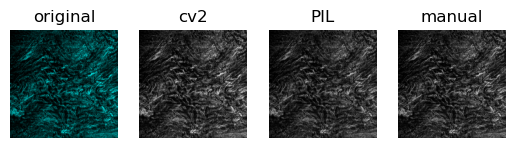

In [6]:
#图象生成完毕，用matplotlib画图以查看效果
img0 = plt.imread('Image 7.tif')
img1 = plt.imread('gray_image_cv2.jpg')
img2 = plt.imread('gray_image_PIL.jpg')
img3 = plt.imread('gray_image_manual.jpg')

fig, axs = plt.subplots(1, 4) 

axs[0].imshow(img0,'gray')  
axs[0].set_title('original')  
axs[0].axis('off')

axs[1].imshow(img1,'gray')  
axs[1].set_title('cv2')  
axs[1].axis('off')

axs[2].imshow(img2,'gray')  
axs[2].set_title('PIL')  
axs[2].axis('off')

axs[3].imshow(img3,'gray')  
axs[3].set_title('manual')  
axs[3].axis('off')

总结：我想你可以看出转化后的结果图有着微妙的不同，这是因为它们采用了不同的灰度转换方式。所以你需要注意你的研究在进行某项操作时需要使用什么算法，不然随便使用库内的现成算法可能会导致结果出现问题。所以很有可能你需要经常使用Numpy打开图片并转化为数组，之后就可以用你需要的算法进行矩阵操作了，最后再将数组转化为图象就可以得到处理后的图象。（我不太清楚你进行矩阵计算的水平，所以这里先不细讲了，有问题再来找我吧）